In [1]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

from treemind import Explainer
from treemind.plot import (
    bar_plot,
    range_plot,
    feature_plot,
    interaction_plot,
)

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

model = LGBMClassifier(verbose=-1)
model.fit(X, y)

LGBMClassifier(verbose=-1)

In [3]:
explainer = Explainer()
explainer(model)

In [4]:
values, raw_score = explainer.analyze_data(X.iloc[14:102, :], detailed=False)

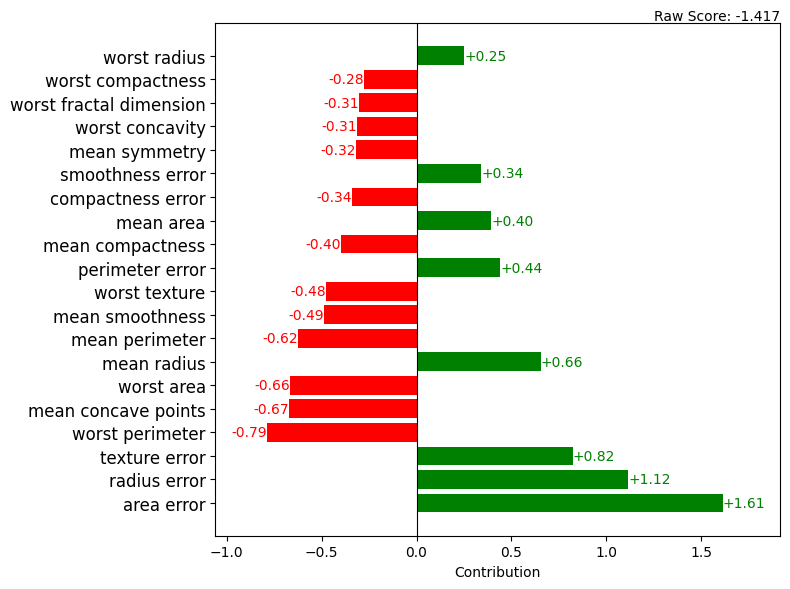

In [5]:
bar_plot(values, raw_score, columns=X.columns)

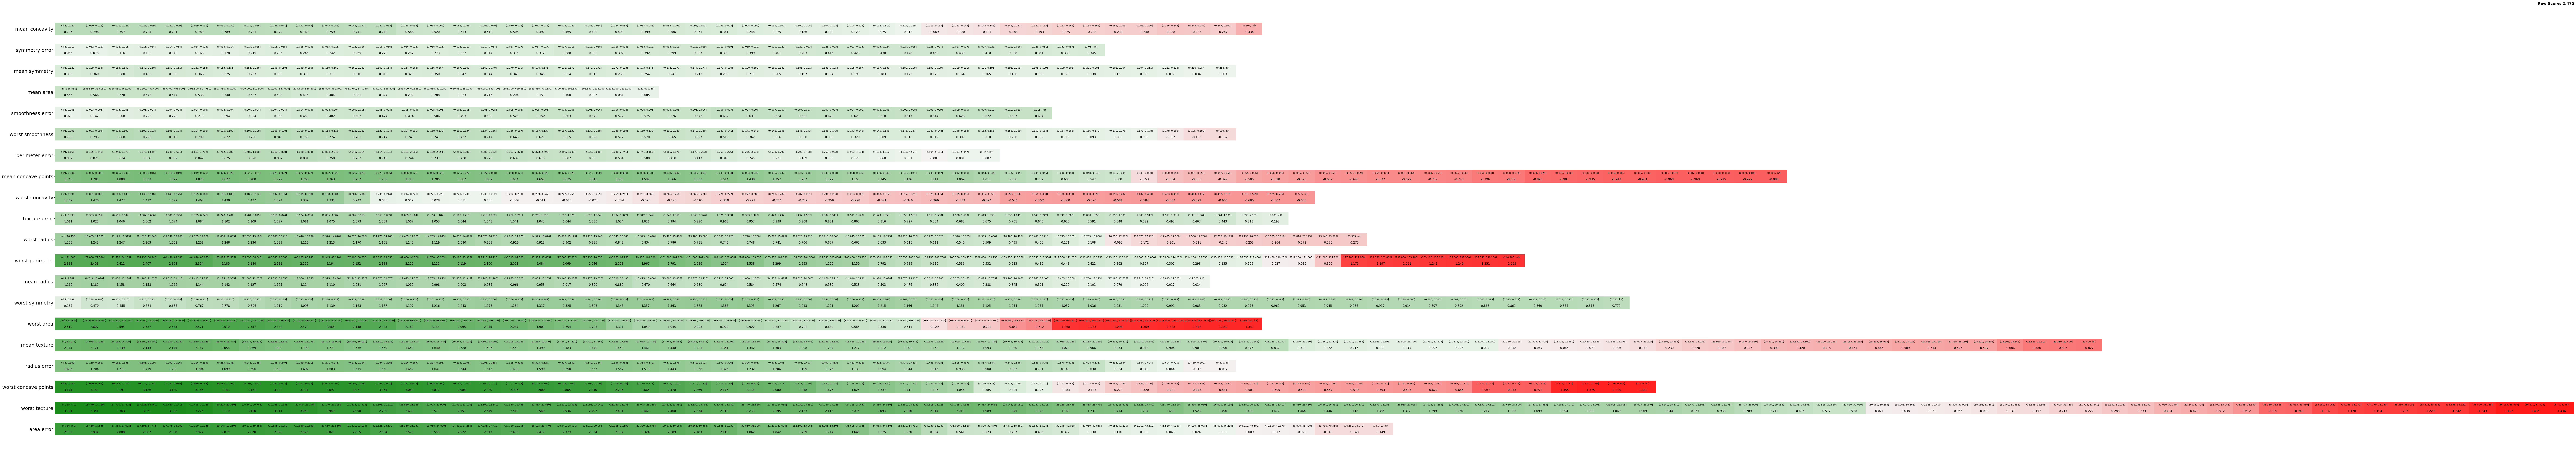

In [6]:
values, split_points, raw_score = explainer.analyze_data(X, detailed=True)

range_plot(values, raw_score, split_points, columns=X.columns)

In [7]:
explainer.count_node(interaction = False).head()

,column_index,count
0,21,1739
1,27,1469
2,22,1422
3,23,1323
4,1,1129


In [8]:
feature_df = explainer.analyze_feature(21)
feature_df.tail()

,worst_texture_lb,worst_texture_ub,mean,min,max
91,35.635,35.820,-2.980631,-8.713258,8.863347
92,35.820,36.135,-3.293693,-8.713258,8.863454
93,36.135,36.810,-3.598868,-8.713258,8.863891
94,36.810,37.025,-3.661669,-8.713258,8.759265
95,37.025,inf,-3.672396,-8.713258,8.759265


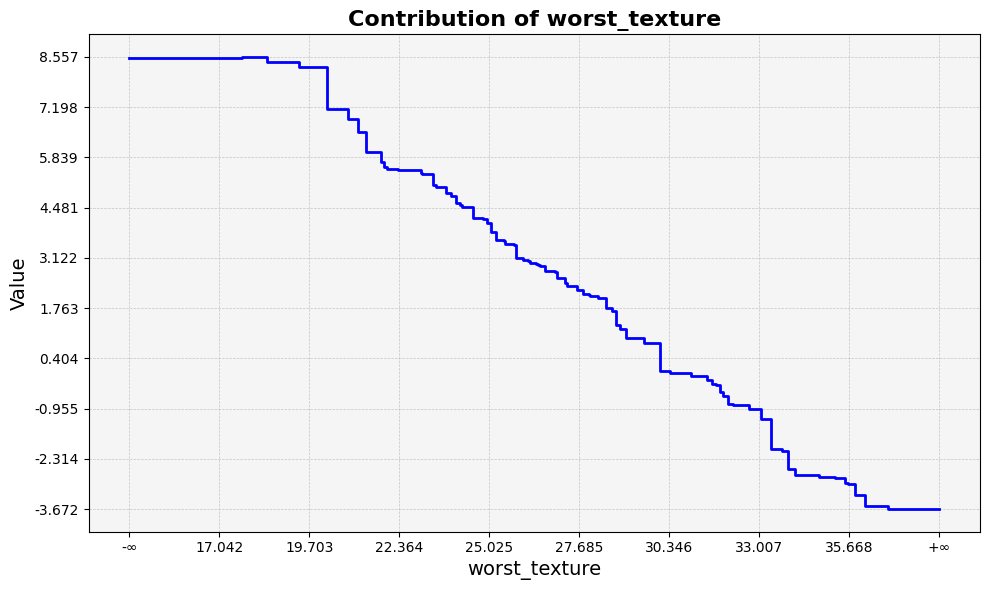

In [9]:
feature_plot(feature_df)

In [10]:
explainer.count_node(interaction = True).head()

,column1_index,column2_index,count
0,21,22,927
1,21,23,876
2,21,27,852
3,1,27,792
4,23,27,734


In [22]:
df = explainer.analyze_interaction(21, 22)
df.head()

,worst_texture_lb,worst_texture_ub,worst_perimeter_lb,worst_perimeter_ub,value
0,-inf,17.710,-inf,71.06,6.111742
1,17.710,17.825,-inf,71.06,6.126359
2,17.825,18.460,-inf,71.06,6.125672
3,18.460,19.415,-inf,71.06,6.125672
4,19.415,20.225,-inf,71.06,6.125672


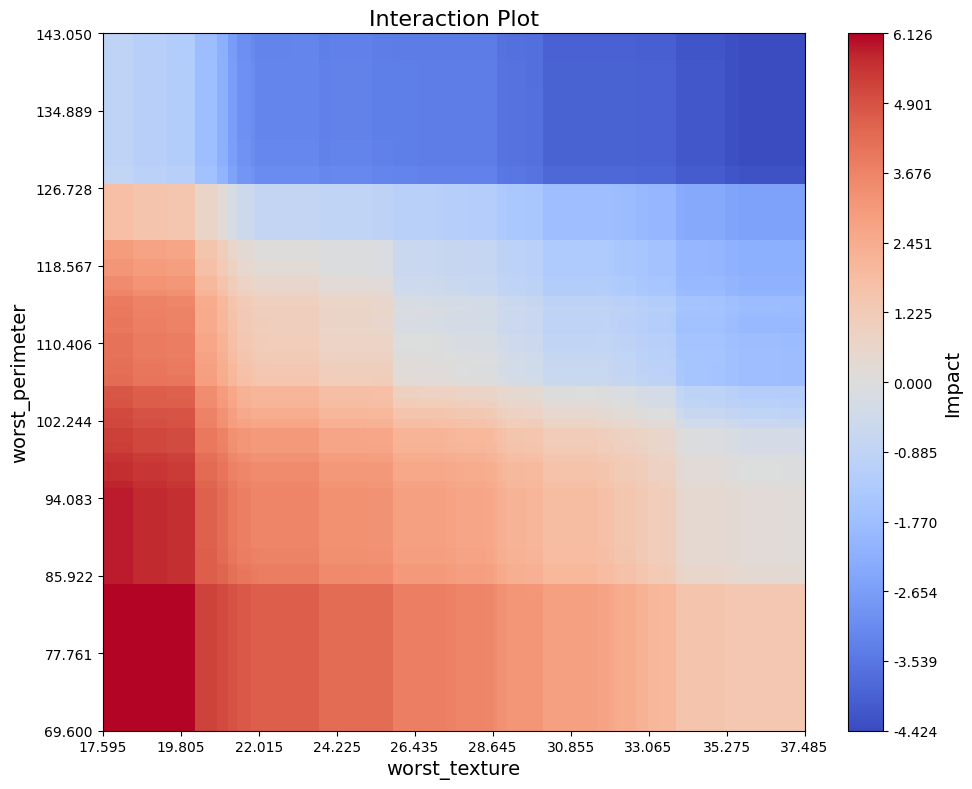

In [23]:
interaction_plot(df)